Task #3
1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule 
data: bioresponse.csv, 
description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”). 
Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.
2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.
3.	For two modifications of gradient descent (pp. 1 and 2), plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 
4.	Implement the Adam optimization method using the numpy library and compare the accuracy of the model fitted with it with the models trained by the classic GD and SGD algorithms.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# reading csv file

df = pd.read_csv('/content/drive/MyDrive/Studies/Data_for_labs/bioresponse.csv')

# Choosing the target variable
y = df['Activity'].values
X_init = df.drop(['Activity'], axis =1)

# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X_init)

# Creating Train and Test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Transposing for future functions
X_train = np.transpose(X_train)
y_train = y_train.reshape(1, len(y_train))
X_test = np.transpose(X_test)
y_test = y_test.reshape(1, len(y_test))


# Part 1. Applying the logistic regression method

In [5]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [6]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [7]:
dim = 1776
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
b = 0.0


In [8]:
w.shape, X_train.shape, y_train.shape

((1776, 1), (1776, 2813), (1, 2813))

In [9]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [10]:
grads, cost = propagate(w, b, X_train, y_train)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.04690128]
 [-0.05414677]
 [-0.07706598]
 ...
 [ 0.00028079]
 [-0.02176421]
 [-0.01170407]]
db = [-0.03288304]
cost = [0.69314718]


In [11]:
grads['dw'].shape, grads['db'].shape

((1776, 1), (1,))

In [82]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
        
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0 or i==num_iterations-1:
            costs.append(cost)

        
        #Print the cost every 100 training iterations
        if print_cost and (i % 100 == 0 or i==num_iterations-1):
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [83]:
params, grads, costs = optimize(w, b, X_train, y_train, num_iterations= 2000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.231068
Cost after iteration 100: 0.230681
Cost after iteration 200: 0.230364
Cost after iteration 300: 0.230059
Cost after iteration 400: 0.229762
Cost after iteration 500: 0.229470
Cost after iteration 600: 0.229183
Cost after iteration 700: 0.228901
Cost after iteration 800: 0.228623
Cost after iteration 900: 0.228349
Cost after iteration 1000: 0.228078
Cost after iteration 1100: 0.227810
Cost after iteration 1200: 0.227546
Cost after iteration 1300: 0.227284
Cost after iteration 1400: 0.227024
Cost after iteration 1500: 0.226767
Cost after iteration 1600: 0.226513
Cost after iteration 1700: 0.226261
Cost after iteration 1800: 0.226011
Cost after iteration 1900: 0.225763
Cost after iteration 1999: 0.225519
w = [[-0.01260962]
 [ 0.10694829]
 [ 0.01757494]
 ...
 [ 0.01028547]
 [ 0.02344358]
 [ 0.03327574]]
b = [0.07239434]
dw = [[ 1.23425091e-04]
 [-1.02927759e-04]
 [ 1.30204308e-04]
 ...
 [-3.68975278e-05]
 [-2.03661782e-04]
 [-1.50844661e-04]]
db = [-0.00505

In [14]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [15]:
print ("predictions = " + str(predict(w, b, X_test)))

predictions = [[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
  1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
  1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.
  1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
  1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
  0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
  1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
  1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
  0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
  1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1.
  1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.
  1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
  1. 1. 0. 0. 1. 1. 0. 0

In [16]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(train_accuracy))
        print("test accuracy: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train accuracy": train_accuracy,
         "test_accuracy": test_accuracy}
    
    return d

In [84]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.612839
Cost after iteration 200: 0.575620
Cost after iteration 300: 0.550998
Cost after iteration 400: 0.532586
Cost after iteration 500: 0.517951
Cost after iteration 600: 0.505873
Cost after iteration 700: 0.495636
Cost after iteration 800: 0.486783
Cost after iteration 900: 0.479005
Cost after iteration 1000: 0.472083
Cost after iteration 1100: 0.465859
Cost after iteration 1200: 0.460212
Cost after iteration 1300: 0.455049
Cost after iteration 1400: 0.450300
Cost after iteration 1500: 0.445907
Cost after iteration 1600: 0.441823
Cost after iteration 1700: 0.438011
Cost after iteration 1800: 0.434438
Cost after iteration 1900: 0.431078
Cost after iteration 1999: 0.427939
train accuracy: 81.33665126199787 %
test accuracy: 76.43923240938166 %


# Part 2. SGD modification

In [86]:
# optimize

def optimize_SGD(w, b, X, Y, batch_size, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a stochastic gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    batch_size -- size of a batch for stochastic optimization
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        minbatch = np.random.randint(0, X.shape[1], batch_size) #getting the random numbers for minibatching

        X_batch, y_batch = X[:, minbatch], Y[:, minbatch] #picking the elements for a minibatch

        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X_batch,y_batch)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        
        # Record the costs
        if i % 100 == 0 or i==num_iterations-1:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and (i % 100 == 0 or i==num_iterations-1):
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [19]:
# model with SGD

def model_SGD(X_train, Y_train, X_test, Y_test, batch_size=100, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize_SGD(w, b, X_train, Y_train, batch_size, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(train_accuracy))
        print("test accuracy: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train accuracy": train_accuracy,
         "test_accuracy": test_accuracy}
    
    return d

In [87]:
d_SGD = model_SGD(X_train, y_train, X_test, y_test, batch_size=100, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.592314
Cost after iteration 200: 0.540974
Cost after iteration 300: 0.555144
Cost after iteration 400: 0.567800
Cost after iteration 500: 0.503600
Cost after iteration 600: 0.527833
Cost after iteration 700: 0.455291
Cost after iteration 800: 0.473691
Cost after iteration 900: 0.459568
Cost after iteration 1000: 0.503382
Cost after iteration 1100: 0.411260
Cost after iteration 1200: 0.501905
Cost after iteration 1300: 0.414521
Cost after iteration 1400: 0.450934
Cost after iteration 1500: 0.442640
Cost after iteration 1600: 0.424026
Cost after iteration 1700: 0.438926
Cost after iteration 1800: 0.414373
Cost after iteration 1900: 0.477945
Cost after iteration 1999: 0.416663
train accuracy: 81.23000355492357 %
test accuracy: 76.01279317697228 %


# Part 3. Plotting the learning curves

In [22]:
# Picking the learning rates
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]

Text(0.5, 1.0, 'GD learning curve')

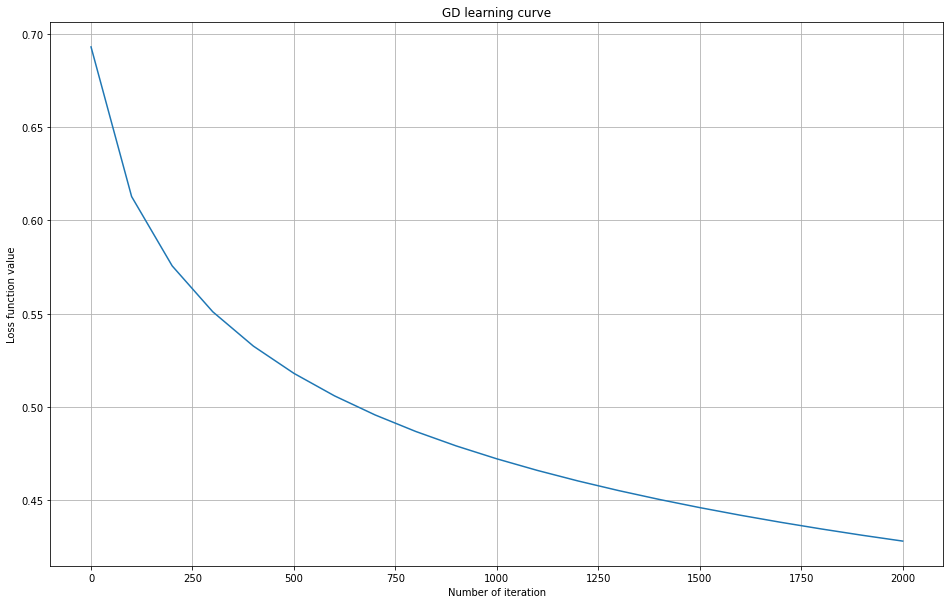

In [89]:
#Plotting the learning curve of the modified model
fig = plt.figure(figsize = (16, 10))

# Numbers of iteration 
N = np.arange(0, d['num_iterations']+1, 100)

plt.plot(N, d['costs'])
plt.grid()
plt.xlabel('Number of iteration')
plt.ylabel('Loss function value')
plt.title('GD learning curve')

Learning rate =  0.001 , model test accuracy =  76.43923240938166  %
Learning rate =  0.005 , model test accuracy =  77.61194029850746  %
Learning rate =  0.01 , model test accuracy =  77.39872068230277  %
Learning rate =  0.05 , model test accuracy =  75.5863539445629  %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


Learning rate =  0.1 , model test accuracy =  74.30703624733476  %


Text(0.5, 1.0, 'GD learning curves')

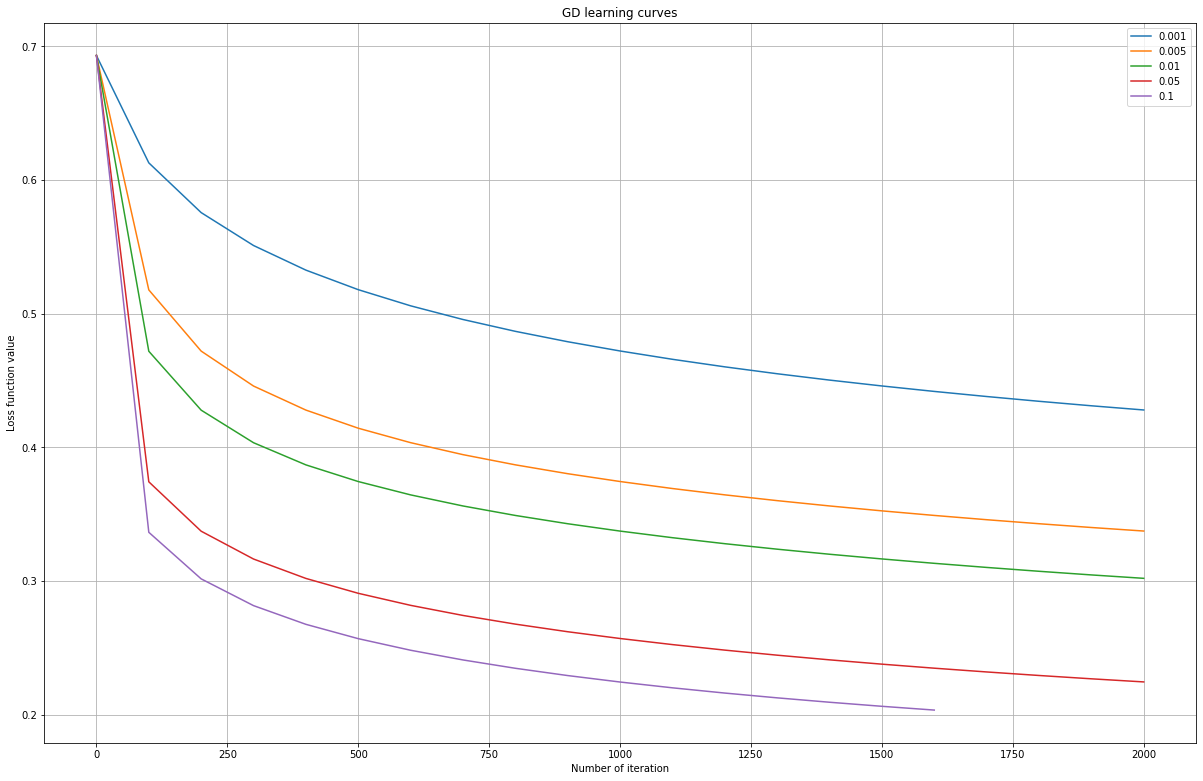

In [90]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_axes([0,0,1,1])
N = np.arange(0, d['num_iterations']+1, 100)

for i in range(5):
    d_i = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = learning_rates[i], print_cost = False)
    ax.plot(N, d_i['costs'], label=str(learning_rates[i]))
    print('Learning rate = ', learning_rates[i], ", model test accuracy = ", d_i['test_accuracy'], ' %')
    
plt.legend()
plt.grid()
plt.xlabel('Number of iteration')
plt.ylabel('Loss function value')
plt.title('GD learning curves', fontsize=12)

Text(0.5, 1.0, 'GD learning curve')

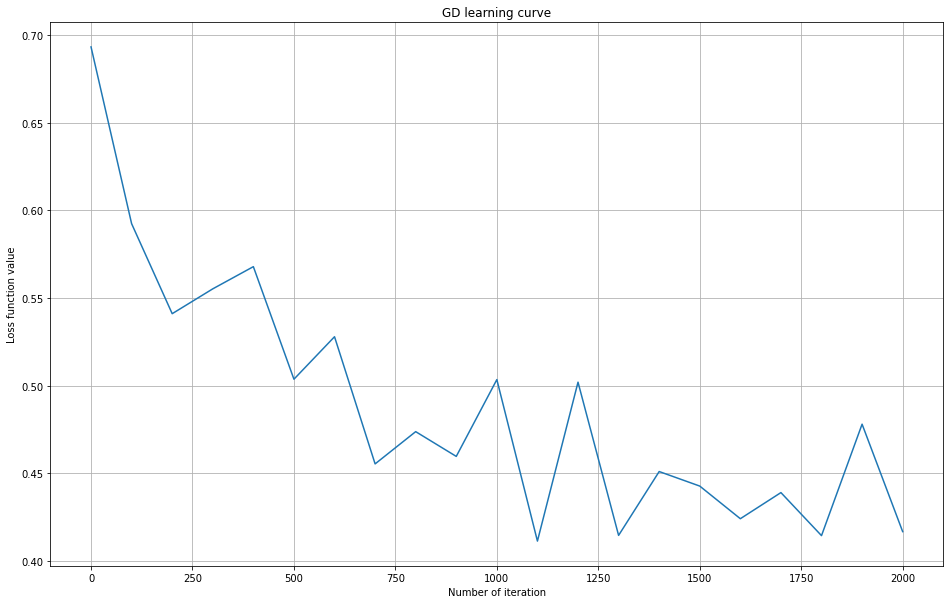

In [92]:
#Plotting the learning curve of the modified model
fig = plt.figure(figsize = (16, 10))

# Numbers of iteration 
N = np.arange(0, d_SGD['num_iterations']+1, 100)

plt.plot(N, d_SGD['costs'])
plt.grid()
plt.xlabel('Number of iteration')
plt.ylabel('Loss function value')
plt.title('GD learning curve')

Learning rate =  0.001 , model test accuracy =  76.86567164179104  %
Learning rate =  0.005 , model test accuracy =  77.61194029850746  %
Learning rate =  0.01 , model test accuracy =  77.29211087420043  %
Learning rate =  0.05 , model test accuracy =  74.6268656716418  %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


Learning rate =  0.1 , model test accuracy =  73.98720682302772  %


Text(0.5, 1.0, 'SGD learning curves')

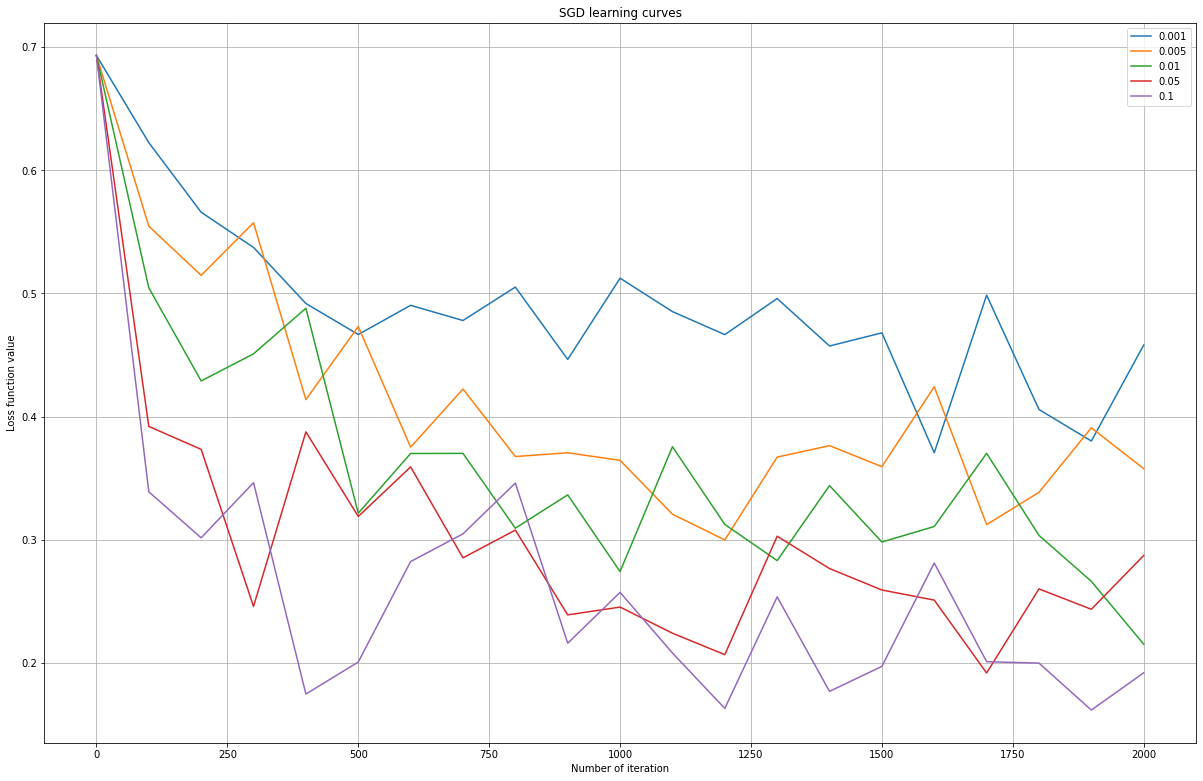

In [93]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_axes([0,0,1,1])
N = np.arange(0, d['num_iterations']+1, 100)

for i in range(5):
    d_SGD = model_SGD(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = learning_rates[i], print_cost = False)
    ax.plot(N, d_SGD['costs'], label=str(learning_rates[i]))
    print('Learning rate = ', learning_rates[i], ", model test accuracy = ", d_SGD['test_accuracy'], ' %')
    
plt.legend()
plt.grid()
plt.xlabel('Number of iteration')
plt.ylabel('Loss function value')
plt.title('SGD learning curves', fontsize=12)

# Part 4. Adam Optimization algorithm

In [94]:
# optimize

def optimize_Adam(w, b, X, Y, batch_size, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    batch_size -- size of a batch for stochastic optimization
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    # Special Adam parameters
    betta1=0.9
    betta2=0.999
    delta=10**(-8)
    
    #1st and 2nd momemt variables
    s_w = np.zeros(w.shape) 
    r_w = np.zeros(w.shape) 

    s_b = 0.
    r_b = 0.

    costs = []

    grads, cost = propagate(w,b,X,Y)
    costs.append(cost)

    
    for i in range(1, num_iterations):
                
        minbatch = np.random.randint(0, X.shape[1], batch_size) #getting the random numbers for minibatching

        X_batch, y_batch = X[:, minbatch], Y[:, minbatch] #picking the elements for a minibatch

        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X_batch,y_batch)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # Updates for weights
        # Update biased first moment estimate
        s_w = betta1 * s_w + (1 - betta1) * dw
        # Update biased second moment estimate
        r_w = betta2 * r_w + (1 - betta2) * np.power(dw, 2)
        # Correct bias in first momemt
        s_corr_w = s_w/(1 - betta1**i)
        # Correct bias in second moment
        r_corr_w = r_w/(1 - betta2**i)
    
        # updates for the bias
        # Update biased first moment estimate
        s_b = betta1 * s_b + (1 - betta1) * db
        # Update biased second moment estimate
        r_b = betta2 * r_b + (1 - betta2) * np.power(db, 2)
        # Correct bias in first momemt
        s_corr_b = s_b/(1 - betta1**i)
        # Correct bias in second moment
        r_corr_b = r_b/(1 - betta2**i)

        # update w and b
        w= w - learning_rate*s_corr_w/(np.sqrt(r_corr_w) + delta)
        b= b - learning_rate*s_corr_b/(np.sqrt(r_corr_b) + delta)
        
        # Record the costs
        if i % 100 == 0 or i==num_iterations-1:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and (i % 100 == 0 or i==num_iterations-1): 
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [47]:
# model with Adam

def model_Adam(X_train, Y_train, X_test, Y_test, batch_size=100, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize_Adam(w, b, X_train, Y_train, batch_size, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(train_accuracy))
        print("test accuracy: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train accuracy": train_accuracy,
         "test_accuracy": test_accuracy}
    
    return d

In [95]:
d_Adam = model_Adam(X_train, y_train, X_test, y_test, batch_size=100, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 100: 0.459673
Cost after iteration 200: 0.390919
Cost after iteration 300: 0.343672
Cost after iteration 400: 0.441554
Cost after iteration 500: 0.386403
Cost after iteration 600: 0.372179
Cost after iteration 700: 0.310868
Cost after iteration 800: 0.323930
Cost after iteration 900: 0.284604
Cost after iteration 1000: 0.282587
Cost after iteration 1100: 0.298852
Cost after iteration 1200: 0.247016
Cost after iteration 1300: 0.315887
Cost after iteration 1400: 0.252161
Cost after iteration 1500: 0.264923
Cost after iteration 1600: 0.226543
Cost after iteration 1700: 0.200880
Cost after iteration 1800: 0.222441
Cost after iteration 1900: 0.289095
Cost after iteration 1999: 0.140169
train accuracy: 90.65055101315322 %
test accuracy: 75.79957356076758 %


# Conclusions

**Accuracies**

As we can see, SGD optimization did not significantly increase train and test accuracies. Also, at later iterations, the second model had even greater losses due to its jumpiness caused by stochasticity. Adam optimizaton significantly increased train accuracy, but did not increase test accuracy. Since test accuracy is more important to consider, it is difficult to state the great improvement, but a long-term improvement (in case of raising a number of iterations) is possible.

**Learning curves**

Plots of changes in costs at each iteration of training at different learning rates show the differences between the original model and the model with SGD optimization. Due to the fact that the SGD model is trained only on minibatch of data at each iteration, the graph of changes in costs looks so volatile. In case of the first model the higher the learning rate, the faster the costs graph decreases, since the gradient descent occurs by a large amount every iteration. In the case of SGD optimization, since the model updates the weights based on a randomly generated subset of data, recalculation can lead to higher costs on some iterations.

As the learning rate increases, the classical model converges to lower total costs. As for the model with SGD, this dependence is not always observed, although the decreasing trend is indeed more noticeable with a higher learning rate.

If we compare the first two models not by the final, but by the lowest costs that they got throughout the entire training, then we see that the SGD learning curve can go lower than the GD learning curve.


**Comparative graph of learning curves for GD, SGD and Adam**

Text(0.5, 1.0, 'Learning curves comparison')

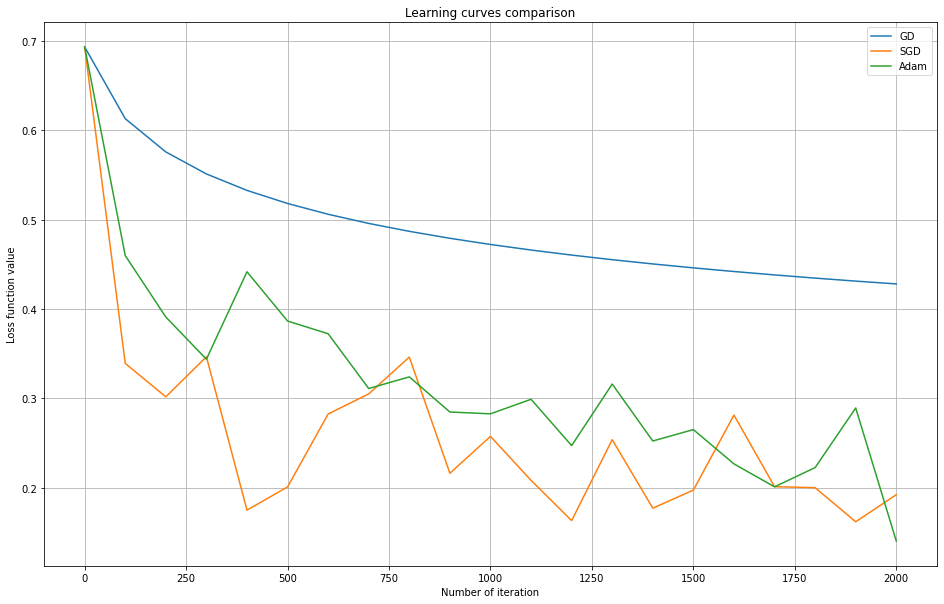

In [96]:
fig = plt.figure(figsize=(16, 10))
N = np.arange(0, d['num_iterations']+1, 100)

plt.plot(N, d['costs'], label='GD')
plt.plot(N, d_SGD['costs'], label='SGD')
plt.plot(N, d_Adam['costs'], label='Adam')

plt.legend()
plt.grid()
plt.xlabel('Number of iteration')
plt.ylabel('Loss function value')
plt.title('Learning curves comparison', fontsize=12)
